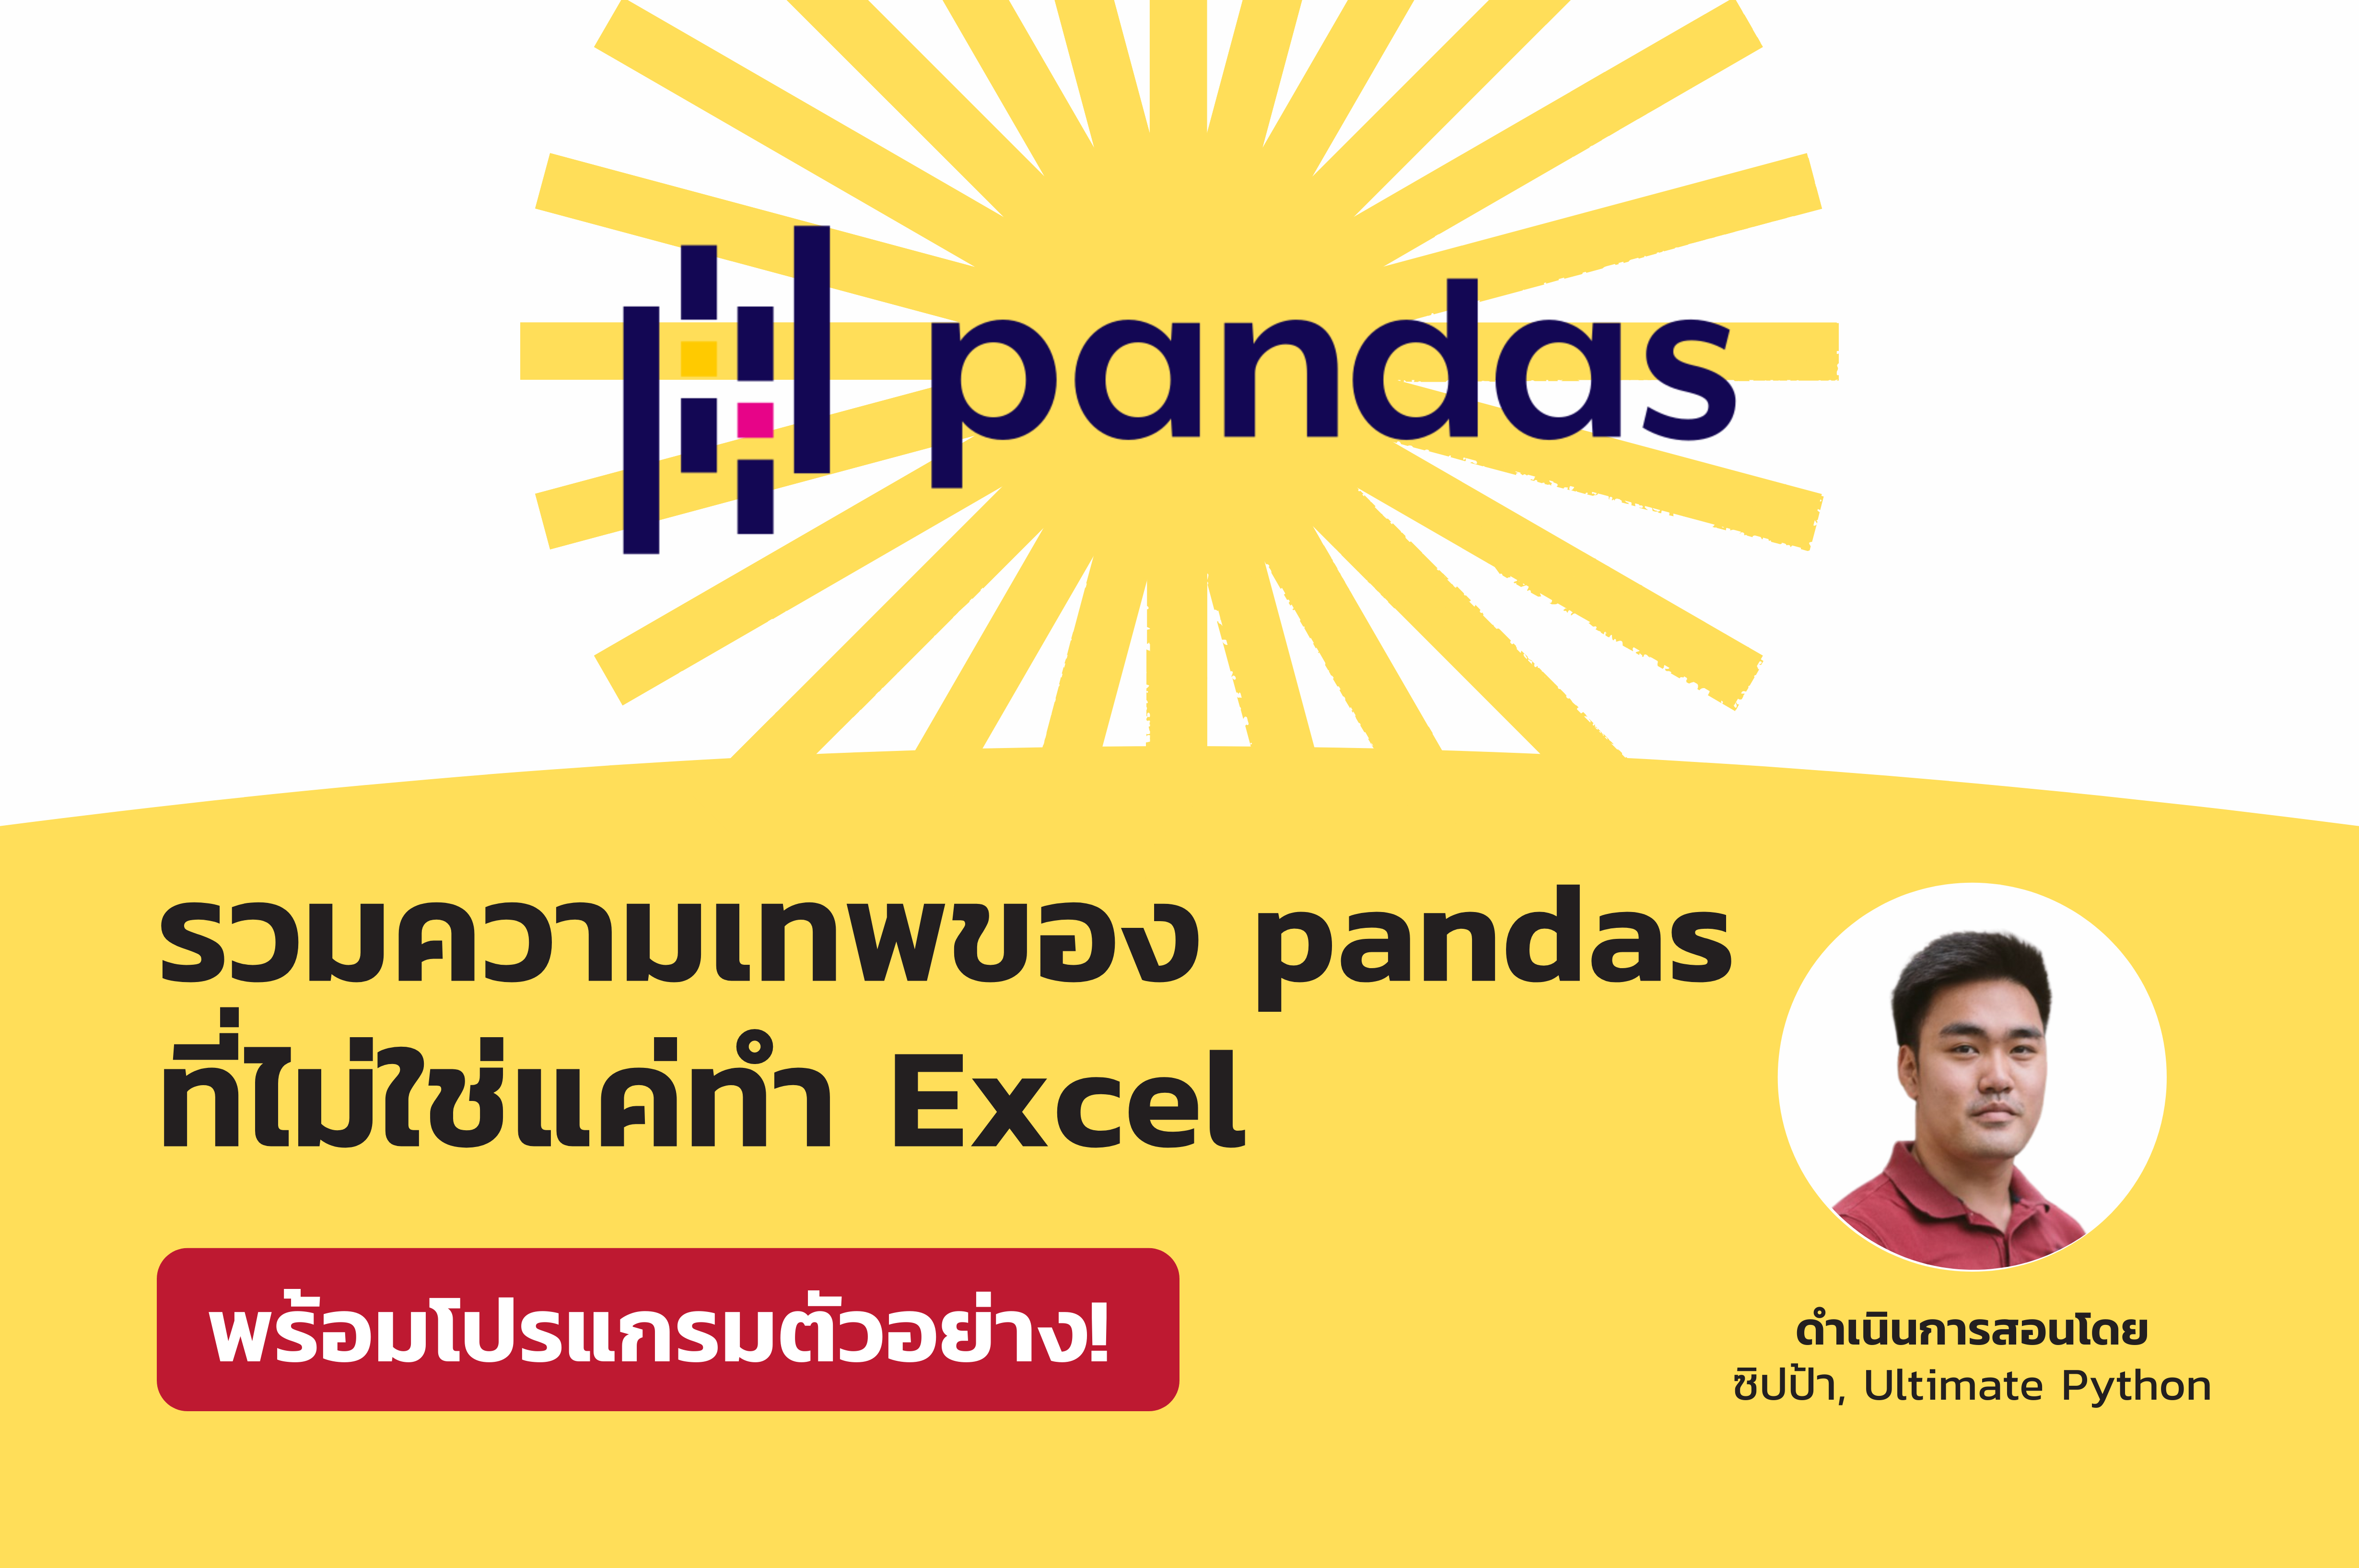

## การเตรียมคำสั่ง Pandas

#### คำสั่งในการดึง pandas มาใช้

pandas เป็น library หรือชุดคำสั่งสำเร็จรูปที่จะต้องมีการติดตั้งในครั้งแรกที่ต้องการใช้งาน ด้วยคำสั่ง pip install และต้องนำเข้ามาใช้ทุกครั้งที่ต้องการใช้งานด้วยคำสั่ง import

#### ติดตั้ง pandas

In [1]:
!pip install pandas

#### นำ pandas มาใช้

In [2]:
import pandas as pd

#### ติดตั้ง openpyxl

In [3]:
!pip install openpyxl

#### ติดตั้ง lxml

In [4]:
!pip install lxml

## 1) ดึงตารางจาก website

ในการแสดงผลบนเวปไซต์มีส่วนเฉพาะที่ใช้แสดงตารางข้อมูล โดยจะมีจุดสังเกตที่ตารางบนเวป จะใช้ tag ชื่อ table ซึ่งเราสามารถใช้คำสั่ง .read_html() กรอก url ที่ต้องการเพื่อดึงตารางที่มีอยู่บนเวปทั้งหมดออกมาได้ในรูปแบบของ List แล้วดึงตารางที่ต้องการออกมาอีกที

In [5]:
pd.read_html('https://coinmarketcap.com/')[0]

,Unnamed: 0,#,Name,Price,24h %,7d %,Market Cap,Volume(24h),Circulating Supply,Last 7 Days,Unnamed: 10
0,NaN,1.0,Bitcoin1BTCBuy,"$48,293.34",2.83%,0.82%,"$912.87B$912,868,111,114","$35,855,938,167742,461 BTC","18,902,568 BTC",NaN,NaN
1,NaN,2.0,Ethereum2ETHBuy,"$4,053.22",9.31%,3.98%,"$481.38B$481,378,796,914","$27,414,833,6096,763,718 ETH","118,764,550 ETH",NaN,NaN
2,NaN,3.0,Binance Coin3BNBBuy,$540.38,6.36%,7.02%,"$90.14B$90,135,627,652","$1,907,622,8753,530,166 BNB","166,801,148 BNB",NaN,NaN
3,NaN,4.0,Tether4USDTBuy,$1.00,0.13%,0.08%,"$76.80B$76,801,243,896","$76,485,164,60676,378,565,322 USDT","76,694,204,084 USDT",NaN,NaN
4,NaN,5.0,Solana5SOLBuy,$182.91,11.72%,0.81%,"$56.30B$56,298,933,995","$3,984,285,97221,782,354 SOL","307,789,981 SOL",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
95,NaN,NaN,RavencoinRVN,$0.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,NaN,NaN,WAXWAXP,$0.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,NaN,NaN,OMG NetworkOMG,$6.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,NaN,NaN,BORABORA,$1.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2) การคำนวนทางสถิติ

#### ตั้งตัวแปร df มาเก็บ DataFrame

เตรียมข้อมูลในตัวแปร df จากการอ่านไฟล์ East.xlsx

In [20]:
df = pd.read_excel(r"excel/East.xlsx",engine="openpyxl")
df = df.set_index('Product')

มีคำสั่งสำเร็จรูป (Method) ที่สามารถเรียกใช้ได้ทันที ไม่ว่าจะเป็น การหาค่าเฉลี่ย, มากสุด, น้อยสุด, standard deviation, หรือการดูค่าทั้งหมด ด้วยคำสั่ง .mean(), .max(), .min(), .std(), .describe()

In [21]:
df.describe()

,Qtr1,Qtr2,Qtr3,Qtr4
count,11.000000,11.000000,11.000000,11.000000
mean,2081.181818,1701.181818,1344.727273,2139.363636
std,3232.884867,2478.104873,1659.385675,3228.893441
min,379.000000,364.000000,327.000000,235.000000
25%,610.000000,462.500000,465.500000,571.500000
50%,688.000000,751.000000,750.000000,744.000000
75%,849.000000,852.000000,929.500000,1158.000000
max,9555.000000,7346.000000,5595.000000,9659.000000


## 3) Pivot Table

การทำงานกับ Pivot Table คือการเลือกนำข้อมูลจากตารางมาทำการเรียบเรียงใหม่ให้เกิดการทำความเข้าใจได้ง่ายขึ้น โดยเราจะใช้คำสั่ง .pivot_table() กับ DataFrame เพื่อเรียบเรียงข้อมูลใหม่

#### ดึงข้อมูลจาก condo all data.xlsx

In [22]:
condo_report = pd.read_excel(r'excel/condo.xlsx',index_col=0)
condo_report.head(5)

,เจ้าของโครงการ,ราคาเริ่มต้น,ราคาเพดาน,ขนาดเริ่มต้น,ขนาดใหญ่ที่สุด,English Name
ชื่อคอนโด,,,,,,
ดิ ออริจิ้น สุขุมวิท-สายลวด อี 22 สเตชั่น (The Origin Sukhumvit-Sailuat E22 Station),ออริจิ้น พร็อพเพอร์ตี้|ดิ ออริจิ้น,1790000.0,NaN,22.0,34.5,The Origin Sukhumvit-Sailuat E22 Station
เดอะ เบส อีส-บางแค (THE BASE Ease-Bangkhae),แสนสิริ|เดอะ เบส,1590000.0,NaN,NaN,NaN,THE BASE Ease-Bangkhae
ไซมิส พระราม 9 (Siamese Rama 9),ไซมิส แอสเสท|ไซมิส,3500000.0,NaN,27.0,65.0,Siamese Rama 9
แอสปาย รัตนาธิเบศร์ เวสต์ตัน (Aspire Rattanathibet - Weston),AP,1590000.0,NaN,NaN,NaN,Aspire Rattanathibet - Weston
สุพรีม เลเจ้นด์ นางลิ้นจี่-พระราม 3 (Supreme Legend Nanglinchi-Rama 3),สุพรีม ทีม,16700000.0,NaN,NaN,NaN,Supreme Legend Nanglinchi-Rama 3


#### ใช้คำสั่ง pd.pivot_table()  นำข้อมูลใส่ parameter data= และกำหนด index ข้อมูลที่ต้องการด้วย index= โดยนิยมใส่เป็น list  เพราะสามารถใส่ได้หลายค่า

In [23]:
pd.pivot_table(data=condo_report,index=['เจ้าของโครงการ'])

,ขนาดเริ่มต้น,ขนาดใหญ่ที่สุด,ราคาเพดาน,ราคาเริ่มต้น
เจ้าของโครงการ,,,,
1.6 ดีเวล็อปเม้นต์,48.100000,184.200,NaN,19000000.0
101 เรียลเอสเตท,29.555000,38.315,2400000.0,1785000.0
39 เอสเตท (ในเครือ แอสเซทไวส์),23.666667,52.000,NaN,1960000.0
8 เอสเตท,24.980000,49.260,NaN,1590000.0
AP,NaN,NaN,NaN,1590000.0
...,...,...,...,...
ไอเอสโอ เรียลเอทเตท,31.500000,53.200,NaN,1290000.0
ไอแอมไชน่าทาวน์,20.500000,24.750,NaN,3300000.0
ไฮท์ โฮลดิ้ง,25.100000,66.000,4724000.0,1367000.0


## 4) การสร้างกราฟ

#### ตั้งตัวแปร df มาเก็บ DataFrame

เตรียมข้อมูลในตัวแปร df จากการอ่านไฟล์ East.xlsx

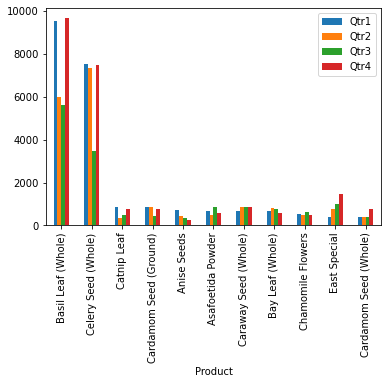

In [25]:
df.plot.bar()

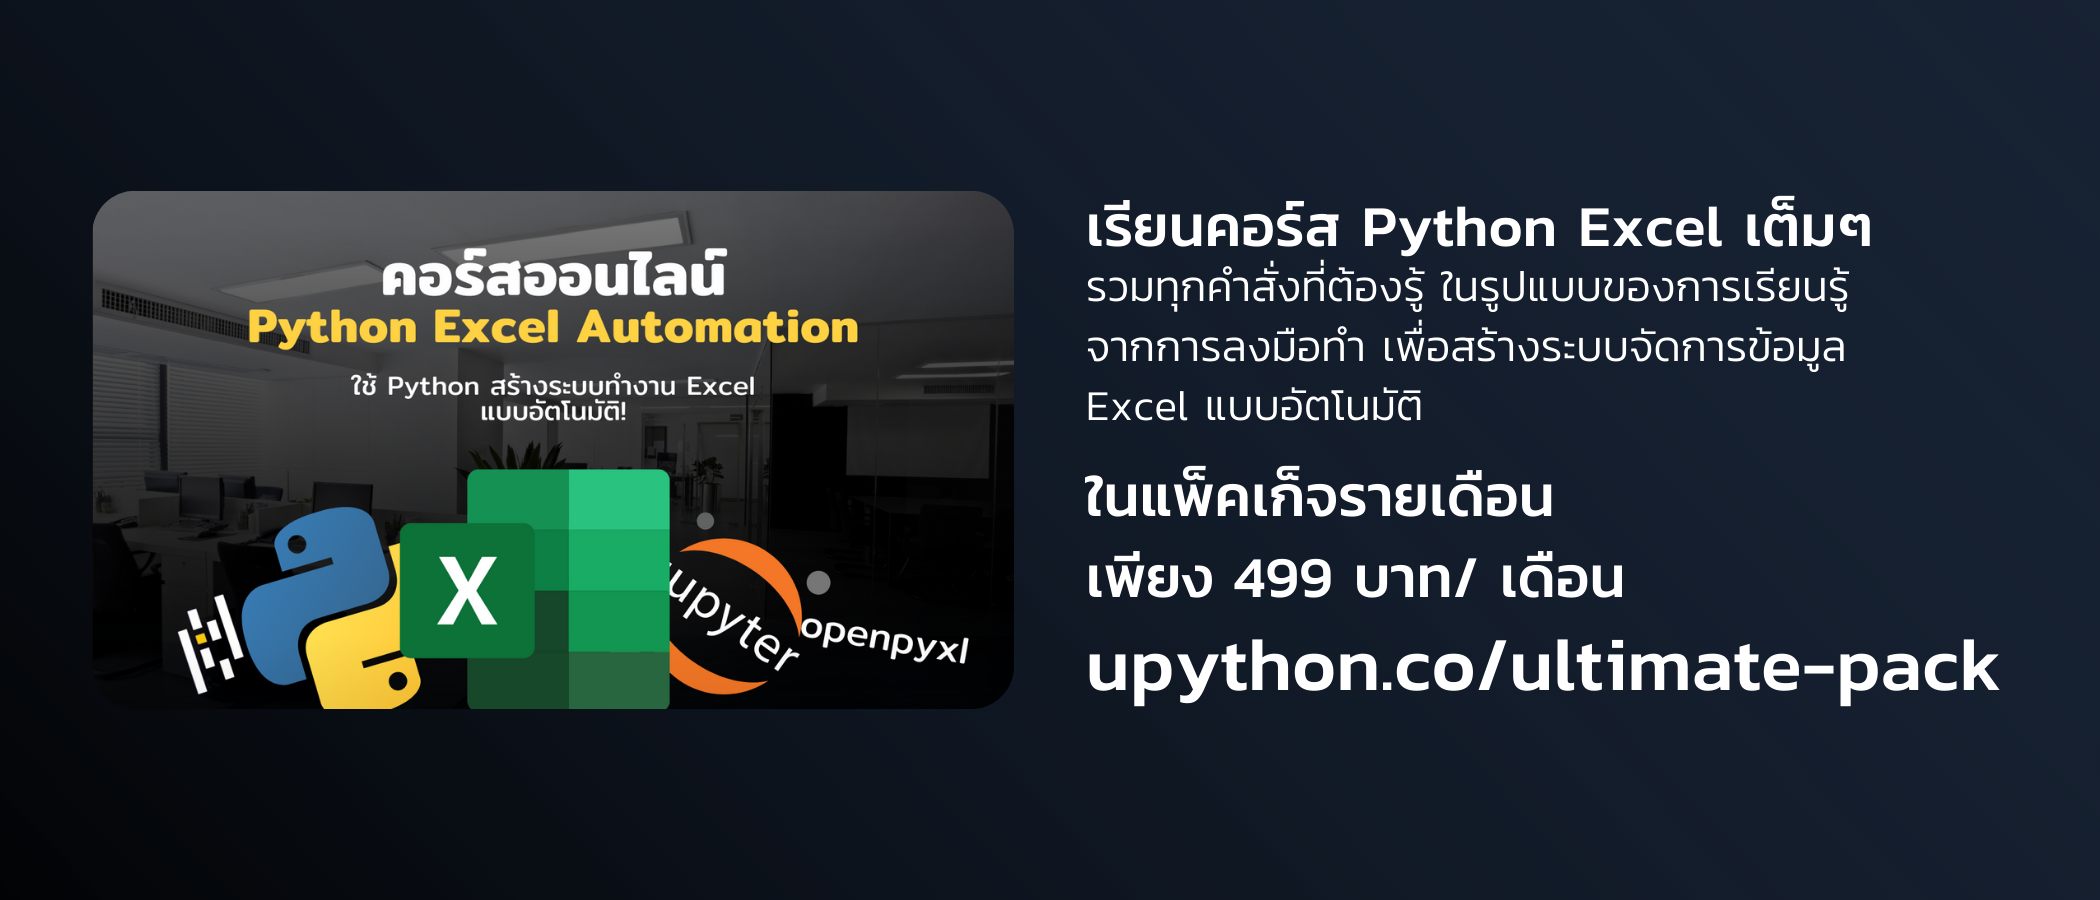

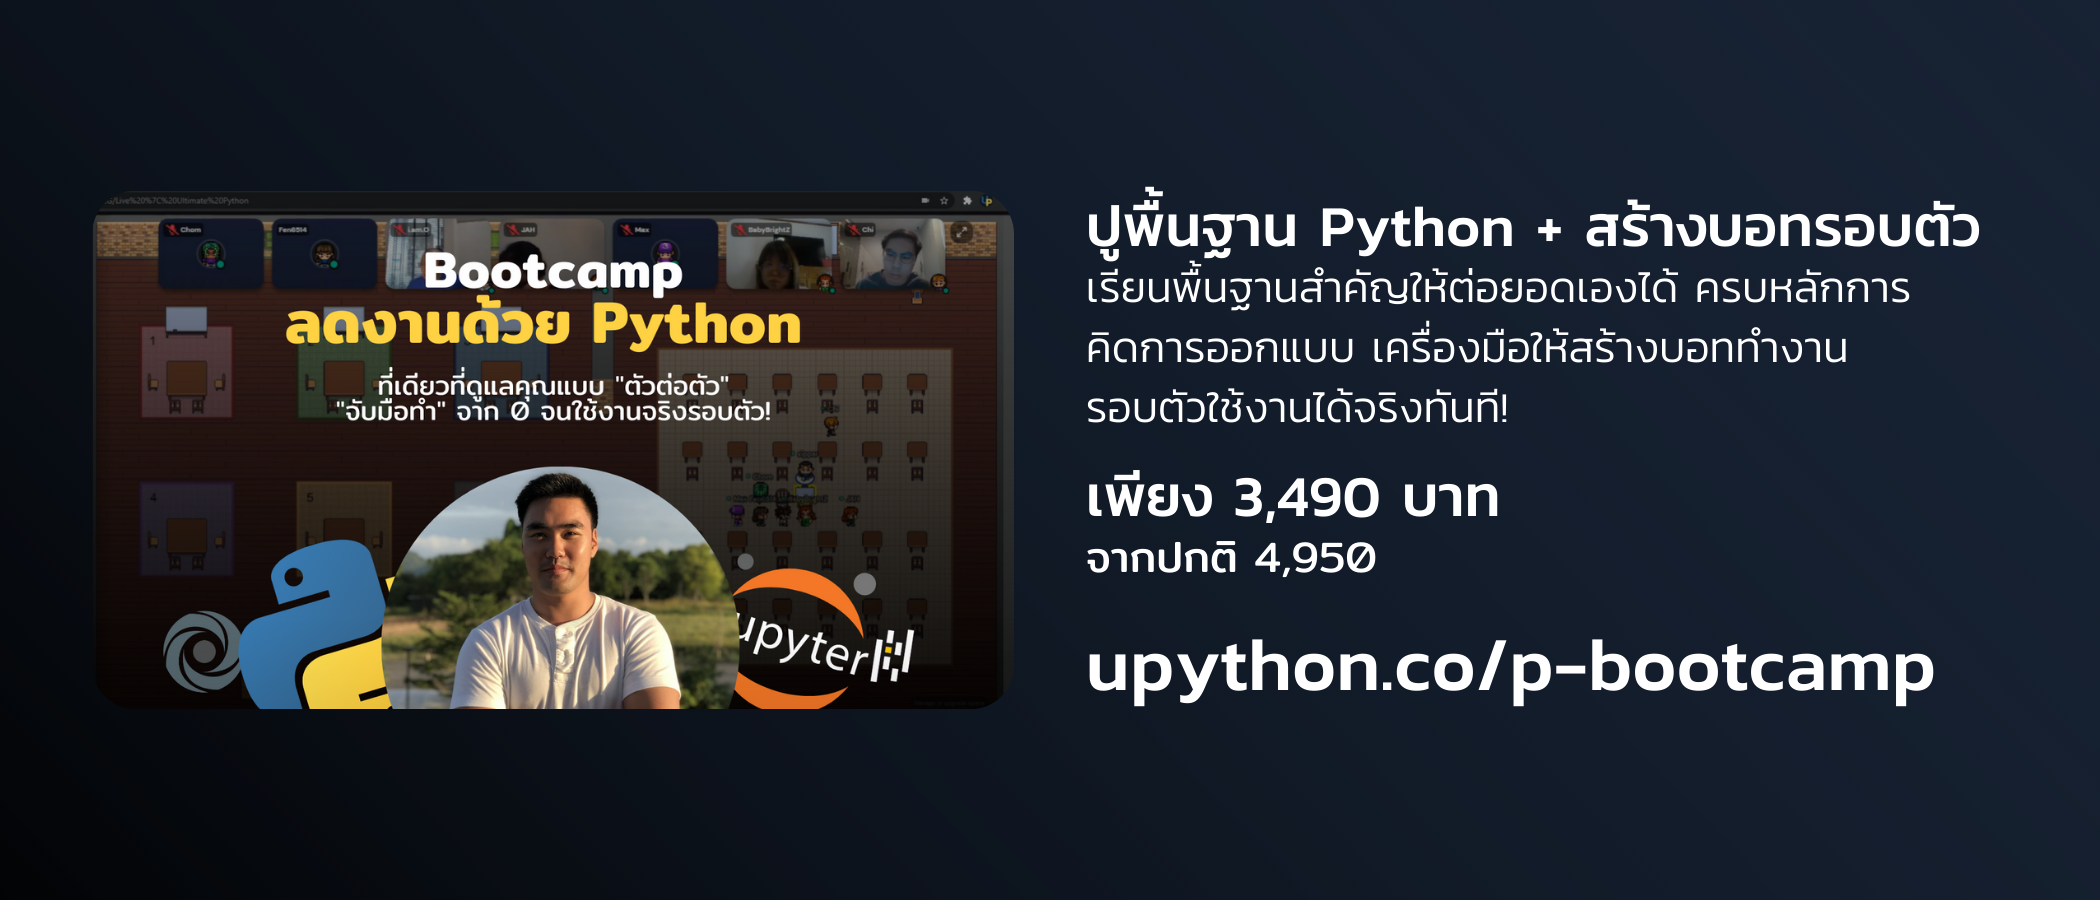